# visualization of the embeddings

In [1]:
# 1. load embeddings
# 2. do tSNE and plot
# 3. do it for many turns

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
import tqdm

In [2]:
# 1 load embeddings

def load_embeddings(path,iter_num,prefix='FACTOR2'):
    file_name=prefix+'_iter_{}'.format(int(iter_num))
    file_path=os.path.join(path,file_name)
    embs=[]
    with open(file_path,'r') as fin:
        for line in fin.readlines():
            line=line.strip().split('\t')
            emb=[float(v) for v in line]
            embs.append(emb)
    return np.array(embs)
            

In [4]:
%matplotlib notebook

In [16]:
# path='../S3CMTF_code/src_data_full_1M_PCA_dim_384/con_iter_200_15x30x20_0.0005_1_4-from-speaker-lr1e-3'
path='../S3CMTF_code/src_data_full_1M_PCA_dim_384/result_opt_15x30x20_0.0005_1_4_200'
iter_num=200
prefix='FACTOR2'
f2_1=load_embeddings(path,iter_num,prefix)

In [17]:
# 2. tsne plotting

n_samples = 300
n_components = 2
perplexity=100
X = f2_1

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='random',
                     random_state=0, perplexity=perplexity,n_iter=300,verbose=1,n_jobs=-1)
Y = tsne.fit_transform(X)
t1 = time()
print("perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
# ax.set_title("Perplexity=%d" % perplexity)
# ax.scatter(Y[red, 0], Y[red, 1], c="r")
# ax.scatter(Y[green, 0], Y[green, 1], c="g")
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
# ax.axis('tight')

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4167 samples in 0.014s...
[t-SNE] Computed neighbors for 4167 samples in 1.831s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4167
[t-SNE] Computed conditional probabilities for sample 2000 / 4167
[t-SNE] Computed conditional probabilities for sample 3000 / 4167
[t-SNE] Computed conditional probabilities for sample 4000 / 4167
[t-SNE] Computed conditional probabilities for sample 4167 / 4167
[t-SNE] Mean sigma: 0.350364
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.656372
[t-SNE] KL divergence after 300 iterations: 2.271782
perplexity=100 in 60 sec


Text(0.5, 1.0, '10 ppl')

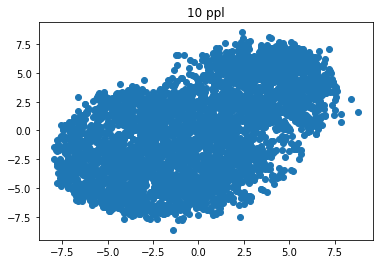

In [18]:
# plot
plt.figure()
plt.scatter(Y[:, 0], Y[:, 1])
plt.title('10 ppl')

In [23]:
# build data files that stores embs from different iters
def build_embs_file_multiple_rounds(out_file,embs_list,rounds_list):
    assert len(embs_list)==len(rounds_list)
    embs_file=out_file+'_emb.tsv'
    meta_file=out_file+'_meta.tsv'
    meta_file_file_header='rounds\tid\n'
    with open(embs_file,'w') as fout:
        for embs in embs_list:
            for line in embs:
                for v in line:
                    fout.write('{}\t'.format(v))
                fout.write('\n')
    with open(meta_file,'w') as fout:
        fout.write(meta_file_file_header)
        for round_ in rounds_list:
            for i in range(embs_list[0].shape[0]):
                fout.write('{}\t{}\n'.format(round_,i))
    print('wrote to',embs_file)
    print('wrote to',meta_file)
    

In [24]:
rounds_list=[1,5,10,20]
path='../S3CMTF_code/src_data_full_1M_PCA_dim_384/con_iter_200_15x30x20_0.0005_1_4-from-speaker-lr1e-3'
# path='../S3CMTF_code/src_data_full_1M_PCA_dim_384/result_opt_15x30x20_0.0005_1_4_200'
embs_list=[]
for iter_num in rounds_list:
    prefix='FACTOR2'
    embs=load_embeddings(path,iter_num,prefix)
    embs_list.append(embs)

In [25]:
out_file='emb_file/con_iter_200_15x30x20_0.0005_1_4-from-speaker-lr1e-3'
build_embs_file_multiple_rounds(out_file,embs_list,rounds_list)

wrote to emb_file/con_iter_200_15x30x20_0.0005_1_4-from-speaker-lr1e-3_emb.tsv
wrote to emb_file/con_iter_200_15x30x20_0.0005_1_4-from-speaker-lr1e-3_meta.tsv


In [27]:
rounds_list=[1,5,10,20,30]
path='../S3CMTF_code/src_data_full_1M_PCA_dim_384/con_iter_200_15x30x20_0.0005_1_4-from-speaker-lr1e-3'
# path='../S3CMTF_code/src_data_full_1M_PCA_dim_384/result_opt_15x30x20_0.0005_1_4_200'
embs_list=[]
num=2000
for iter_num in rounds_list:
    prefix='FACTOR2'
    embs=load_embeddings(path,iter_num,prefix)
    embs_list.append(embs[:num,:])

out_file='emb_file/con_iter_200_15x30x20_0.0005_1_4-from-speaker-lr1e-3_2000'
build_embs_file_multiple_rounds(out_file,embs_list,rounds_list)

In [28]:
rounds_list=[1,5,10,20,30]
path='../S3CMTF_code/src_data_full_1M_PCA_dim_384/con_iter_200_15x30x20_0.0005_1_4-from-speaker-load-only-FACTOR2'
# path='../S3CMTF_code/src_data_full_1M_PCA_dim_384/result_opt_15x30x20_0.0005_1_4_200'
embs_list=[]
num=2000
for iter_num in rounds_list:
    prefix='FACTOR2'
    embs=load_embeddings(path,iter_num,prefix)
    embs_list.append(embs[:num,:])

out_file='emb_file/con_iter_200_15x30x20_0.0005_1_4-from-speaker-load-only-FACTOR2_2000'
build_embs_file_multiple_rounds(out_file,embs_list,rounds_list)

wrote to emb_file/con_iter_200_15x30x20_0.0005_1_4-from-speaker-load-only-FACTOR2_2000_emb.tsv
wrote to emb_file/con_iter_200_15x30x20_0.0005_1_4-from-speaker-load-only-FACTOR2_2000_meta.tsv
